In [10]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
#from surprise import evaluate, print_perf
from surprise import Reader
from surprise import BaselineOnly, KNNBasic, KNNBaseline, SlopeOne
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import io
import pandas as pd

# 读取物品（电影）名称信息
def read_item_names():
    file_name = ('./movies.csv') 
    data = pd.read_csv('./movies.csv')
    rid_to_name = {}
    name_to_rid = {}
    for i in range(len(data['movieId'])):
        rid_to_name[data['movieId'][i]] = data['title'][i]
        name_to_rid[data['title'][i]] = data['movieId'][i]

    return rid_to_name, name_to_rid 

# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('./ratings.csv', reader=reader)
train_set = data.build_full_trainset()


# 使用SlopeOne算法
algo = SlopeOne()
algo.fit(train_set)
# 对指定用户和商品进行评分预测
uid = str(196) 
iid = str(302) 
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.32   {'was_impossible': False}


# slope one原理
最大优点在于算法很简单, 易于实现, 效率高且推荐准确度较高。

适用于item更新不频繁，数量相对较稳定

item数<<user数

依赖用户行为，存在冷启动问题和稀疏性问题

Step1，计算Item之间的评分差的均值，记为评分偏差（两个item都评分过的用户）
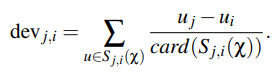商品i和j之间被共同用户打分过的个数


Step2，根据Item间的评分偏差和用户的历史评分，预测用户对未评分的item的评分
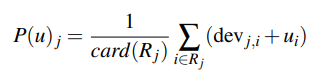


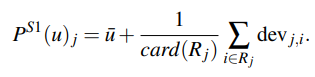

Step3，将预测评分排序，取topN对应的item推荐给用户